In [1]:
# script for creating netcdf files ready for musa

import numpy as np
import pandas as pd
import xarray as xr
# system stuff
from glob import glob
import os
import sys
import socket
import datetime
import matplotlib.pyplot as plt
#import pyproj

# import custom modules
if socket.gethostname() == 'ra':
    basepath = '/home/marcomaz/snowdepth/'
else :    
    basepath = '/uio/hypatia/geofag-felles/projects/snowdepth/'
mytoolspath = basepath + 'code/tools/own_repos/snowdepth/tools'
sys.path.append(mytoolspath)
wd = basepath+'marcomaz/Izas_op_2/'
#dempath = basepath+'data/MuSA_op/MuSA_input/DEM/DEM.nc'
#topopath = basepath+'data/Modeling/TopoSCALE/'
dempath = basepath+'data/Modeling/MuSA/DEM/Dem_full.nc'

In [5]:
#dempath = basepath+'data/Modeling/MuSA/DEM/Dem_2.nc'
#topopath = basepath+'data/Modeling/TopoSCALE/'
#forcingpath = basepath+'data/Modeling/MuSA/MuSA_input/Forcing_2/'

dem = xr.open_dataset(dempath)

#define some functions

def ord_to_dt(ord):
    dt  = datetime.datetime.fromordinal(int(ord)) + datetime.timedelta(hours=int(ord%1*24)) - datetime.timedelta(days = 366)
    return dt


def get_indexes(xi,xf,yi,yf,ts):
    
    ei = np.where(s2.x >= xi)[0][0]
    ef = np.where(s2.x <= xf)[0][-1]
    
    ni = np.where(s2.y >= yi)[0][-1]
    nf = np.where(s2.y <= yf)[0][0]
    
    return ei,ef,ni,nf


In [6]:
s2_path = basepath+'data/Modeling/Sentinel2/Izas_S2_unmixed_fSCA.nc'
obs_path = basepath+'data/Modeling/MuSA/MuSA_input_full/S2_018/'
#define resolution
res = 20

s2 = xr.open_dataset(s2_path,engine='netcdf4')

xi,xf,yi,yf = dem.easting.min().values,dem.easting.max().values,dem.northing.min().values,dem.northing.max().values

s2 = s2.sel(x=slice(xi,xf),y=slice(yf,yi))#,t=slice("2019-09-01", "2020-08-31"))


In [7]:
sd=0.18

In [8]:
i = 25

In [9]:
date = datetime.datetime(s2.year.values[i], 1, 1) + datetime.timedelta(int(s2.DOY.values[i]) - 1)


In [10]:
date> datetime.datetime.strptime("2019-09-01","%Y-%m-%d") and date< datetime.datetime.strptime("2020-08-31","%Y-%m-%d") 

True

20200205


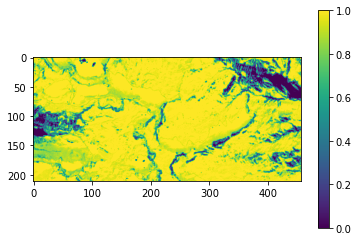

20200210


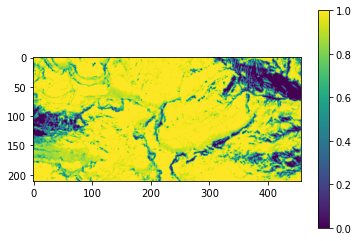

20200215


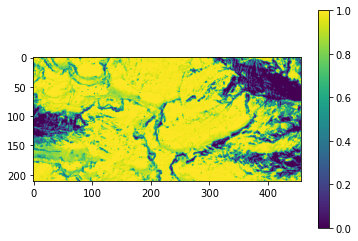

20200218


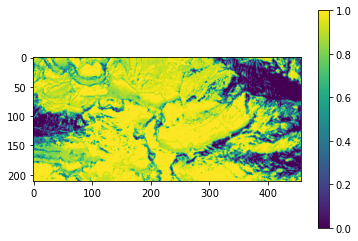

20200220


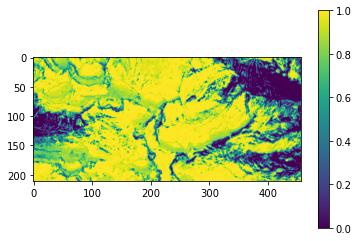

20200223


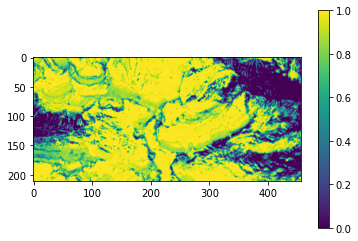

20200311


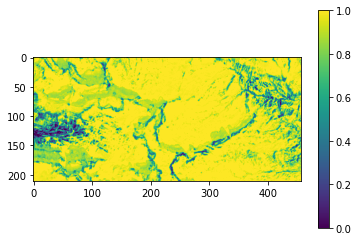

20200321


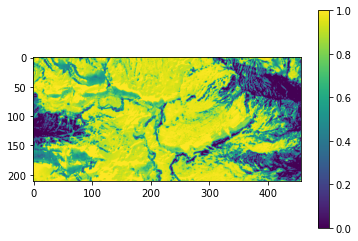

20200326


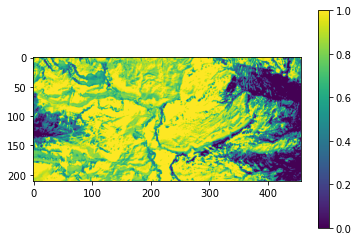

20200329


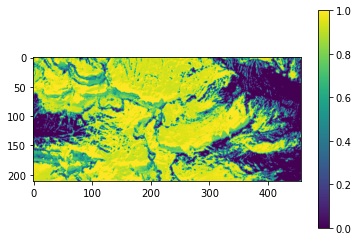

20200403


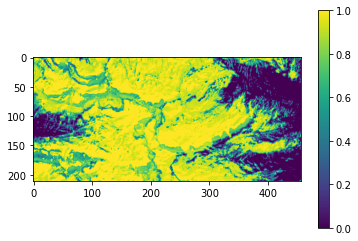

20200405


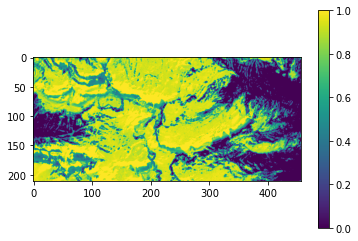

20200503


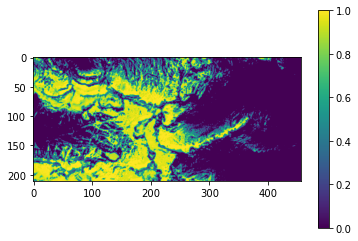

20200518


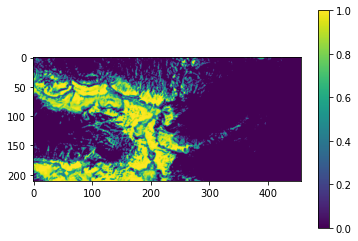

20200520


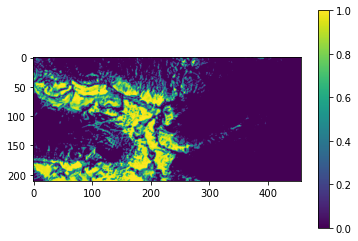

20200622


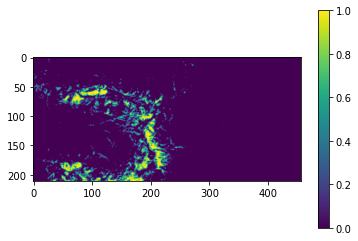

20200704


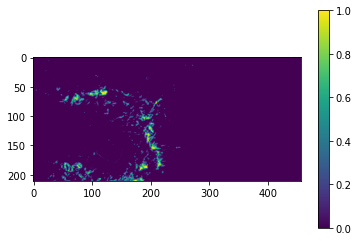

20200707


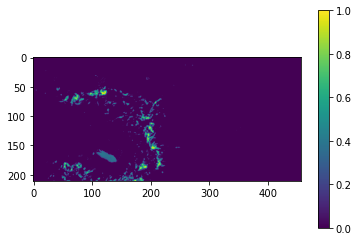

20200717


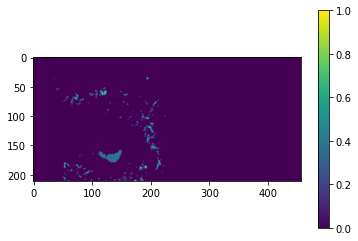

In [8]:
for i in range(len(s2.t)):
    
    date = datetime.datetime(s2.year.values[i], 1, 1) + datetime.timedelta(int(s2.DOY.values[i]) - 1)
    
    if date> datetime.datetime.strptime("2019-09-01","%Y-%m-%d") and date< datetime.datetime.strptime("2020-08-31","%Y-%m-%d") :

        var = s2.sel(t=i)
        var.fSCA.assign_attrs({'long_name': 'Spectrally unmixed fSCA.'})

        data = var.fSCA.values.astype('float64')

        var = var.transpose()

        var.fSCA.values = data.transpose()/100

        ds = var.fSCA.assign_attrs({'_FillValue': -99999})

        ds = ds.expand_dims(dim={"time":[np.datetime64(date)]})

        ds = ds.transpose('time','y','x')

        ds = ds.rename({'y': 'northing','x':'easting'})

        ds = ds.to_dataset()

        ds= ds.assign_attrs(s2.attrs)
        ds['fSCA']=ds.fSCA.assign_attrs({'long_name': 'Spectrally unmixed fSCA.'})

        sds = xr.DataArray(data = np.ones(shape = ds.fSCA.shape)*sd,name='sd',coords=ds.fSCA.coords)

        ds = ds.merge(sds)
        #ds.to_netcdf(obs_path+'fSCA_'+date.strftime("%Y%m%d")+'.nc')

        print(date.strftime("%Y%m%d"))
        plt.imshow(ds.fSCA.values[0])
        plt.colorbar()
        plt.show()

20200205


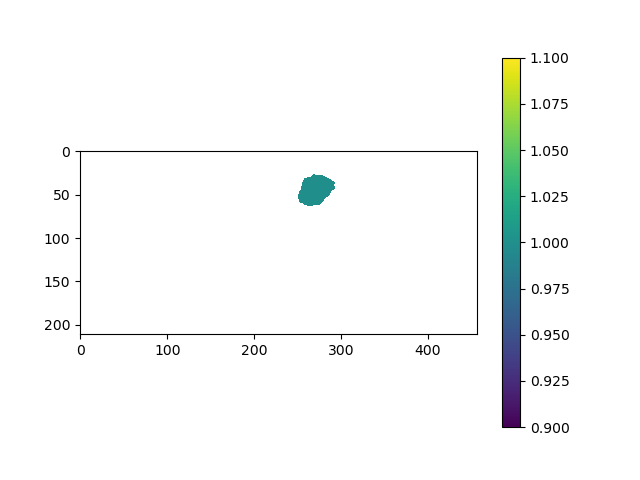

20200210


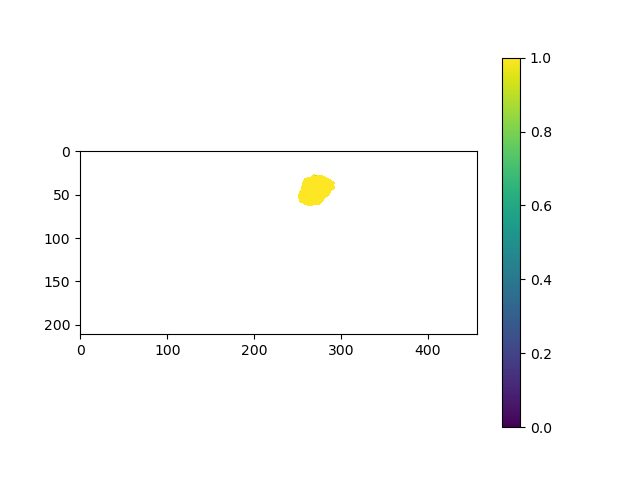

20200215


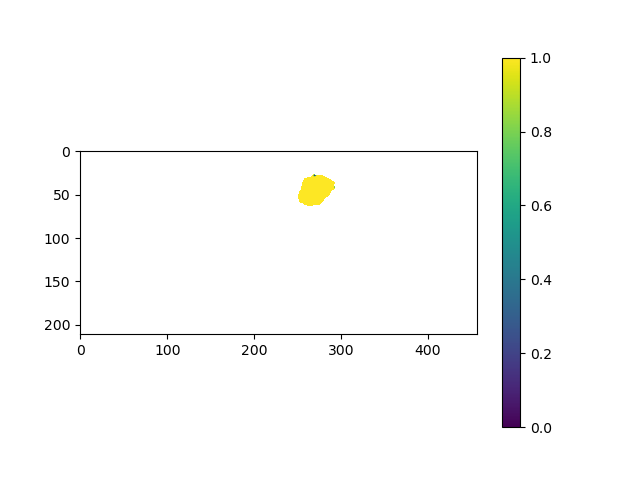

20200218


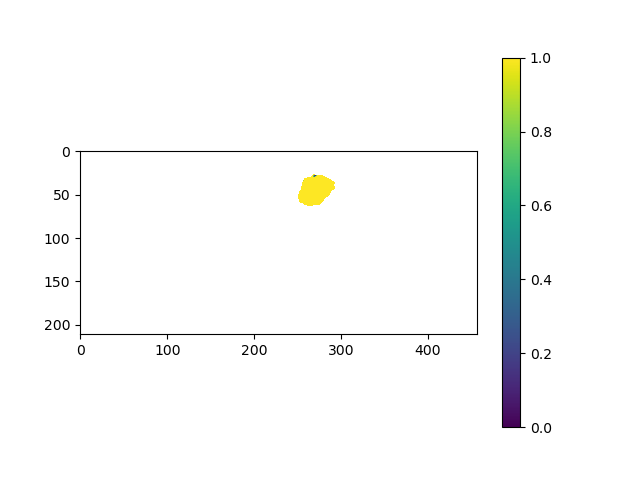

20200220


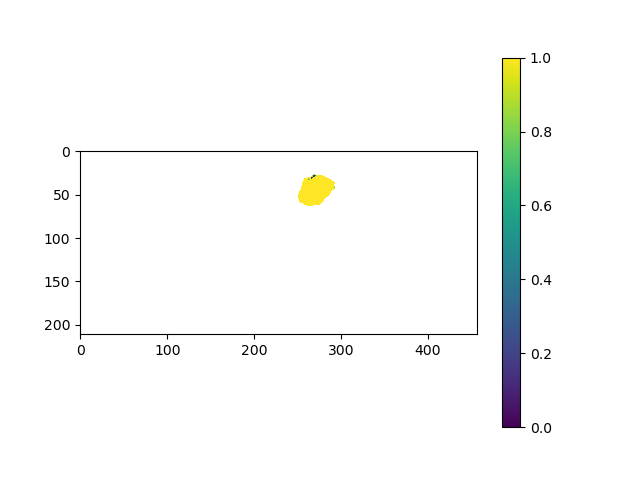

20200223


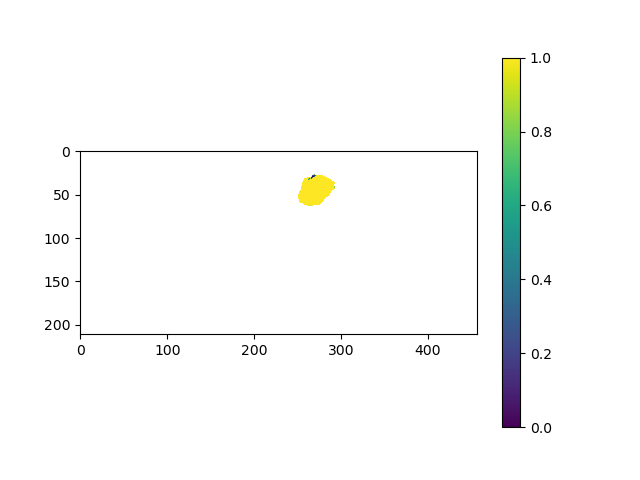

20200311


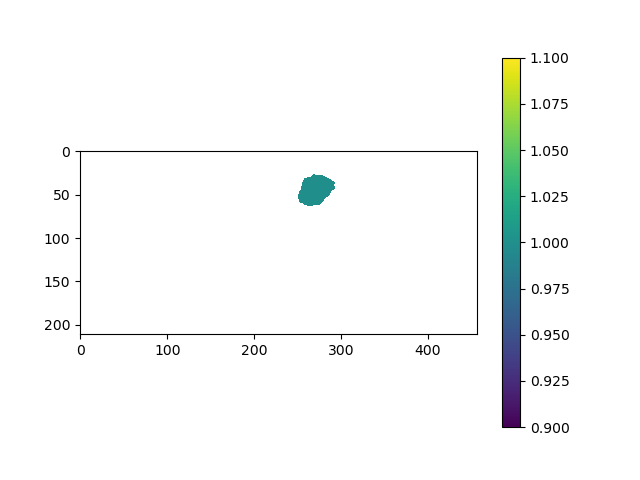

20200321


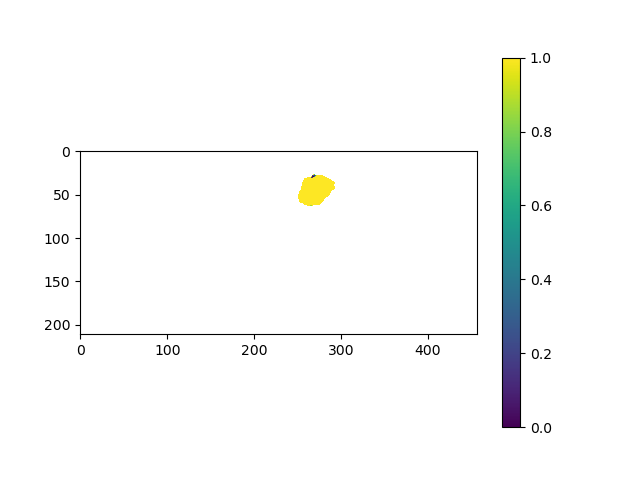

20200326


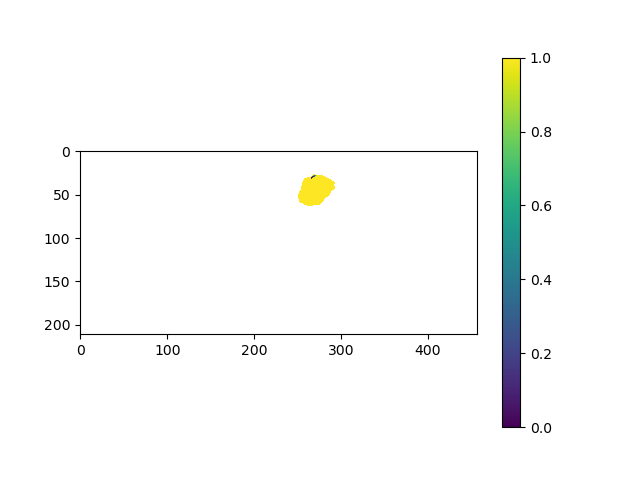

20200329


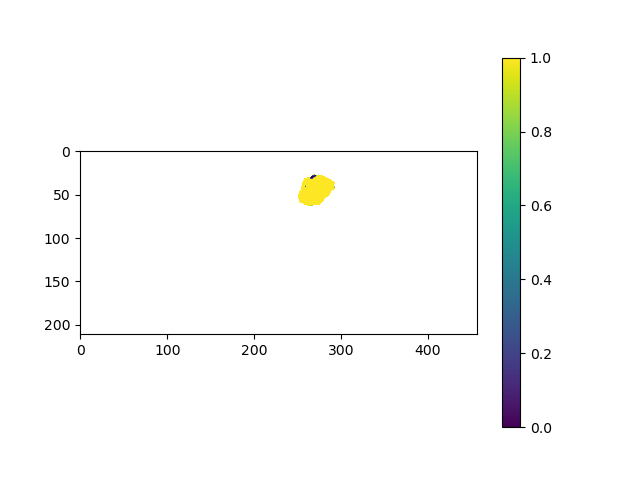

20200403


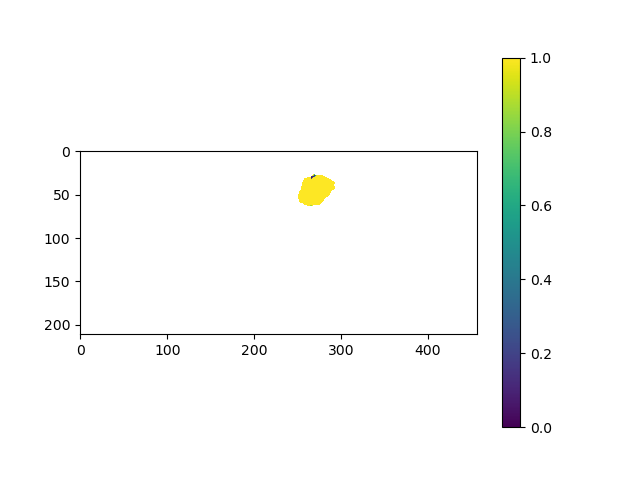

20200405


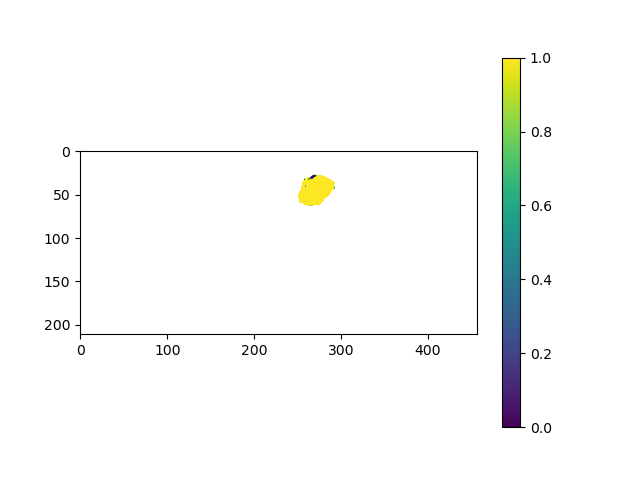

20200503


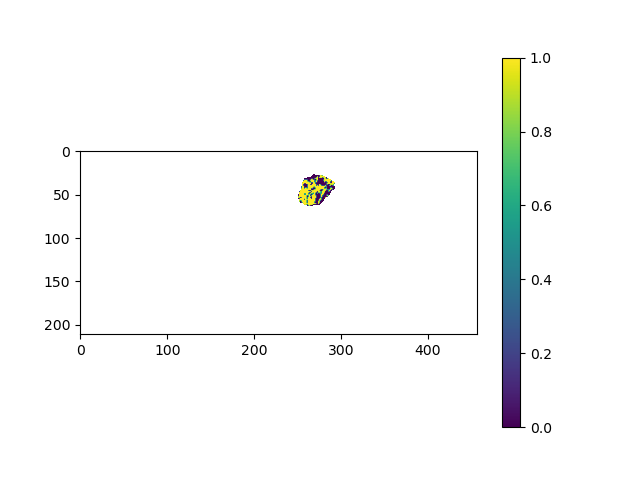

20200518


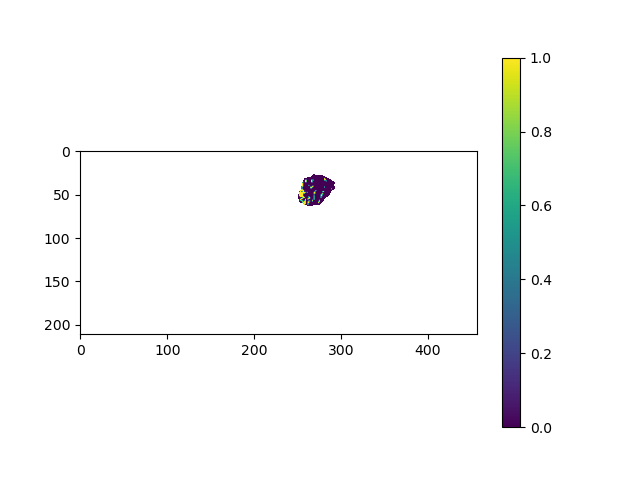

20200520


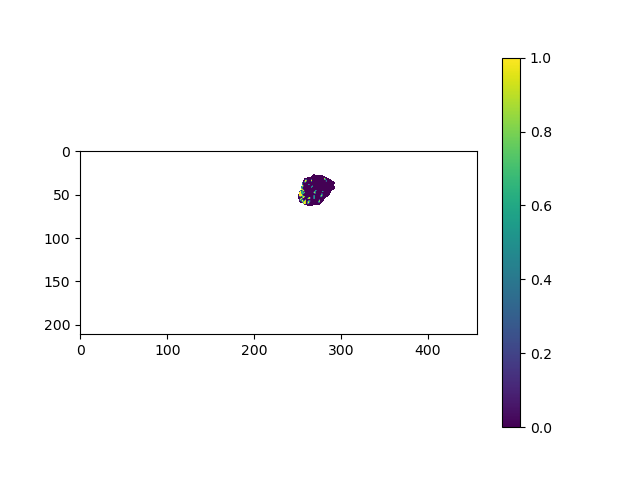

20200622


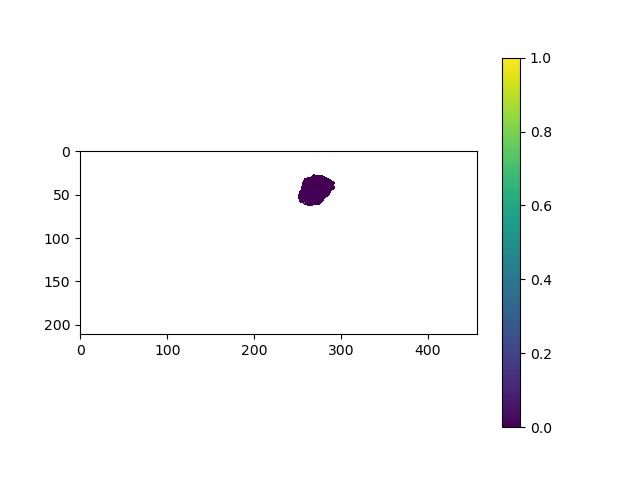

20200704


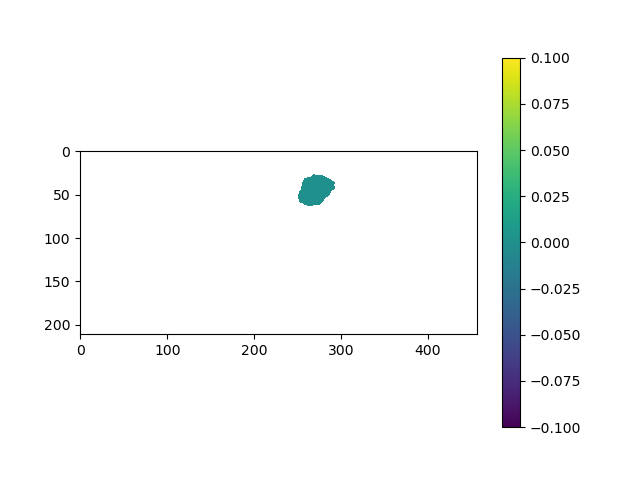

20200707


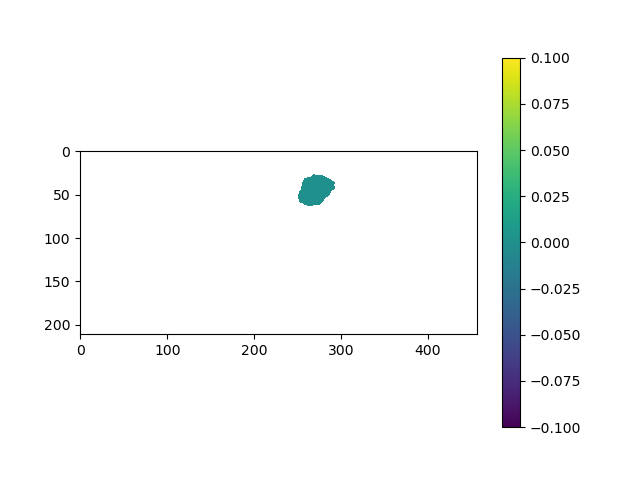

20200717


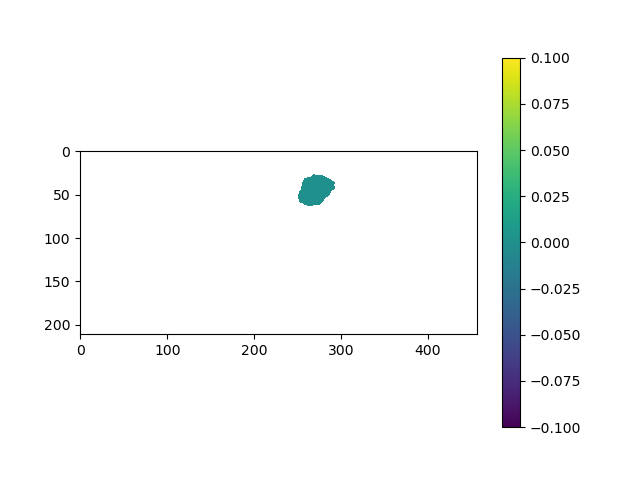

In [14]:
%matplotlib widget
for i in range(len(s2.t)):
    date = datetime.datetime(s2.year.values[i], 1, 1) + datetime.timedelta(int(s2.DOY.values[i]) - 1)
    if date> datetime.datetime.strptime("2019-09-01","%Y-%m-%d") and date< datetime.datetime.strptime("2020-08-31","%Y-%m-%d") :
        plt.figure()
        ds= xr.open_dataset(obs_path+'fSCA_'+date.strftime("%Y%m%d")+'.nc')
        print(date.strftime("%Y%m%d"))
        plt.imshow(ds.fSCA.values[0]*mask.values)
        plt.colorbar()
        plt.show()
        

In [3]:
mask = basepath+'data/Modeling/MuSA/MuSA_input_full/mask/mask_qgis.nc'
mask = xr.open_dataarray(mask)

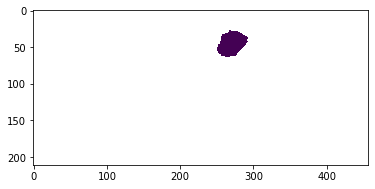

In [4]:
plt.imshow(mask.values)

In [74]:
obs_path

'/home/marcomaz/snowdepth/data/Modeling/Sentinel2/Obs/'

In [73]:
obs = xr.open_dataset(f'{obs_path})

SyntaxError: unterminated string literal (detected at line 1) (215103534.py, line 1)

In [4]:
xr.open_dataset('/home/marcomaz/snowdepth/data/Modeling/MuSA/MuSA_input/Obs/obs_20200205_10_20m.nc')

<xarray.Dataset>
Dimensions:     (time: 1, northing: 136, easting: 59)
Coordinates:
  * time        (time) datetime64[ns] 2020-02-05T04:00:38.847547136
  * northing    (northing) float64 4.736e+06 4.736e+06 ... 4.734e+06 4.734e+06
  * easting     (easting) float64 7.103e+05 7.103e+05 ... 7.114e+05 7.114e+05
Data variables:
    snow_depth  (time, northing, easting) float64 ...
    sd          (time, northing, easting) float64 ...
Attributes:
    createdby:    Marco Mazzolini
    Conventions:  CF-1.5

In [6]:
xr.open_dataset('/home/marcomaz/snowdepth/data/Modeling/MuSA/MuSA_input_full/S2/fSCA_20200205.nc')

<xarray.Dataset>
Dimensions:   (time: 1, easting: 457, northing: 211)
Coordinates:
  * time      (time) datetime64[ns] 2020-02-05
  * easting   (easting) float64 7.056e+05 7.056e+05 ... 7.147e+05 7.147e+05
  * northing  (northing) float64 4.736e+06 4.736e+06 ... 4.732e+06 4.732e+06
Data variables:
    fSCA      (time, northing, easting) float32 ...
    sd        (time, northing, easting) float64 ...
Attributes: (12/20)
    Name:                      Izas fSCA
    Contains:                  fSCA, retrieved by unmixing Sentinel-2 surface...
    Location:                  The area around the Izas catchment
    Time period:               2019 to 2022
    Georeferencing:            Pixels/cells are regularly spaced in zone 30T ...
    Convention:                By convention, the first pixel (i.e.: row inde...
    ...                        ...
    Information:               Contact kristoffer.aalstad@geo.uio.no
    Created by:                Kristoffer Aalstad
    Created:                   07-Jun-2023 20:16:22
    References:                The fSCA unmixing method is described in Aalst...
    Citation:                  Please cite Aalstad et al. (2020) and acknowle...
    License:                   CC BY 4.0

In [53]:
np.datetime64(date)

numpy.datetime64('2022-07-07T00:00:00.000000')